## King County Housing Data Analysis

* Name name: Raye Yoo
* Project completed date/time: Sunday 5 August 2023

# Business Problems
Sky renovation company is King County-based home renovation consulting provider. Their main target is homeowners in the same area to maximise their house value who are considering a house renovation and potential house flipping. We want to know which parameters are most relevant to the house price throughout the Multiple regression.

## 1. Data Scrub
### 1-1. Importing Data

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
plt.style.use('ggplot')

from statsmodels.formula.api import ols
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

data = pd.read_csv('data/kc_house_data.csv')

### 1-2. Exploring & Cleaning Data 

#### 1-2-1. Exploring Data

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
data.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

#### Column Names and descriptions for Kings County Data Set
* id - unique identified for a house
* dateDate - house was sold
* pricePrice - is prediction target
* bedroomsNumber - of Bedrooms/House
* bathroomsNumber - of bathrooms/bedrooms
* sqft_livingsquare - footage of the home
* sqft_lotsquare - footage of the lot
* floorsTotal - floors (levels) in house
* waterfront - House which has a view to a waterfront
* view - Has been viewed
* condition - How good the condition is ( Overall )
* grade - overall grade given to the housing unit, based on King County grading system
* sqft_above - square footage of house apart from basement
* sqft_basement - square footage of the basement
* yr_built - Built Year
* yr_renovated - Year when house was renovated
* zipcode - zipcode
* lat - Latitude coordinate
* long - Longitude coordinate
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [4]:
# our prediction model doesn't apply below variables this time, so drop
data =  data.drop(columns=['id','date','view','zipcode'])

In [5]:
#get some idea of categorical, or numerical data
data.nunique()

price            3622
bedrooms           12
bathrooms          29
sqft_living      1034
sqft_lot         9776
floors              6
waterfront          2
condition           5
grade              11
sqft_above        942
sqft_basement     304
yr_built          116
yr_renovated       70
lat              5033
long              751
sqft_living15     777
sqft_lot15       8682
dtype: int64

Found that there is some data that is not a format of float '?'. 
Decided to convert them into '0.0' to interpret as there are no basements in the houses.

In [6]:
data['sqft_basement'].sort_values().tail(10)

6028     ?
12361    ?
5376     ?
11586    ?
10544    ?
2041     ?
10910    ?
12363    ?
6410     ?
19234    ?
Name: sqft_basement, dtype: object

In [7]:
#Replace the data value '?' to 0.0 & convert the data type from objext to float
data['sqft_basement'] = data['sqft_basement'].replace(['?'], '0.0').astype(float)

In [8]:
data['waterfront'] = data['waterfront'].fillna(0.0)
data['yr_renovated'] = data['yr_renovated'].fillna(0.0)

In [9]:
#make the renovation categorical variation
#True (1) or False (0)
data['renovated']=data['yr_renovated'].copy().astype(int)
data['basement']=data['sqft_basement'].copy().astype(int)

In [10]:
data.loc[(data.renovated > 1000), ('renovated')] = 1
data.loc[(data.basement > 1), ('basement')] = 1

In [11]:
data = data.drop(['yr_renovated','sqft_basement'],axis=1)

In [12]:
data.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0         0.0   
1  538000.0         3       2.25         2570      7242     2.0         0.0   
2  180000.0         2       1.00          770     10000     1.0         0.0   
3  604000.0         4       3.00         1960      5000     1.0         0.0   
4  510000.0         3       2.00         1680      8080     1.0         0.0   

   condition  grade  sqft_above  yr_built      lat     long  sqft_living15  \
0          3      7        1180      1955  47.5112 -122.257           1340   
1          3      7        2170      1951  47.7210 -122.319           1690   
2          3      6         770      1933  47.7379 -122.233           2720   
3          5      7        1050      1965  47.5208 -122.393           1360   
4          3      8        1680      1987  47.6168 -122.045           1800   

   sqft_lot15  renovated  basement  
0        5650          0         0  
1        7639          1         1  
2        8062          0         0  
3        5000          0         1  
4        7503          0         0

#### 1-2-2. Checking Data Distribution

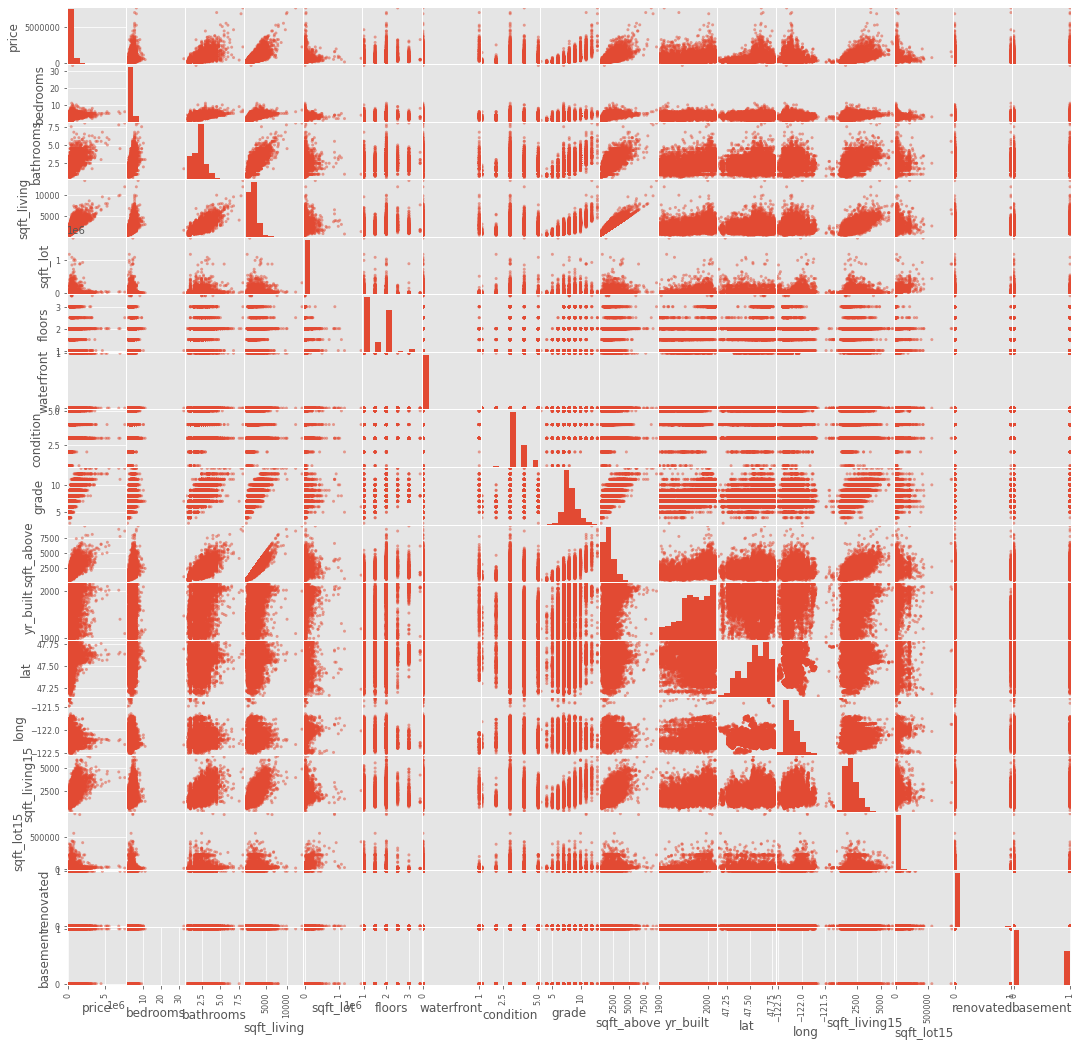

In [13]:
pd.plotting.scatter_matrix(data, figsize = [18,18]);
plt.show();

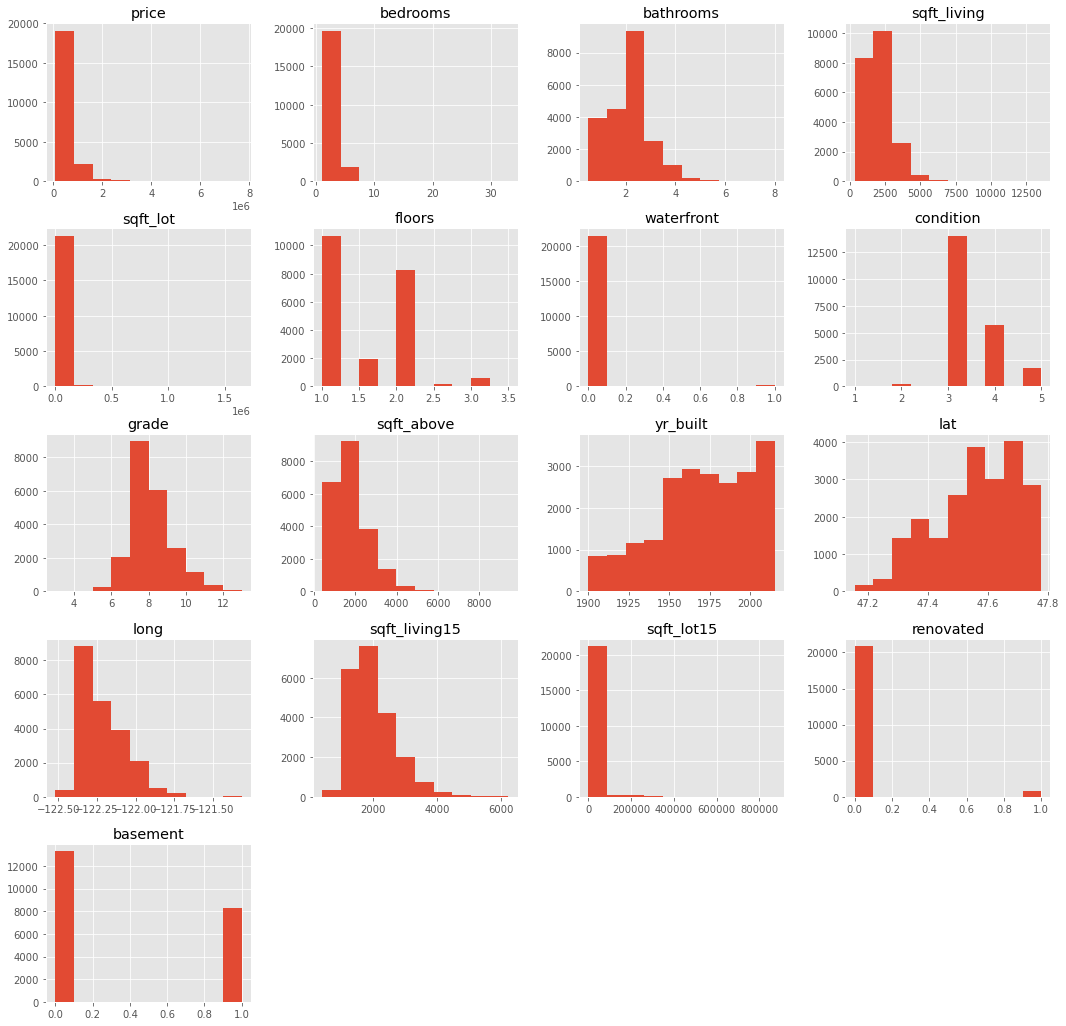

In [14]:
data.hist(figsize = (18,18));

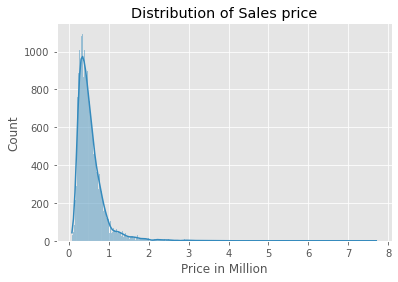

In [15]:
#Analysis of Key variables against the target variable - Price
#bell-shaped, but very much left skewed

sns.histplot(data['price'].div(1000000), kde=True)
plt.title('Distribution of Sales price')
plt.xlabel('Price in Million');

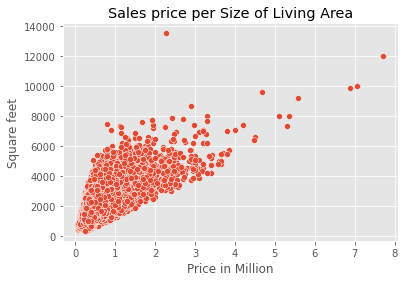

In [16]:
#Price per living area
#given the outliers, it appears as corn-shaped, but clearly can see a linear relationship
sns.scatterplot(x=data['price'].div(1000000), y=data['sqft_living'],data=data)
plt.title('Sales price per Size of Living Area')
plt.xlabel('Price in Million')
plt.ylabel('Square feet');

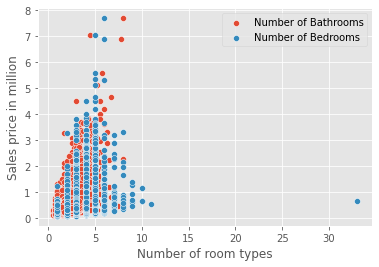

In [17]:
#Price per number of bathrooms & bedrooms
#very similiar shape of data distribution
#number of bathroom and bedroom effects sales price
#can identify outlier for the number of bedrooms

y=data['price'].div(1000000)

sns.scatterplot(x=data['bathrooms'], y=y, label='Number of Bathrooms')
sns.scatterplot(x=data['bedrooms'], y=y, label='Number of Bedrooms')
plt.xlabel('Number of room types')
plt.ylabel('Sales price in million')
plt.legend(loc='upper right')
plt.show();

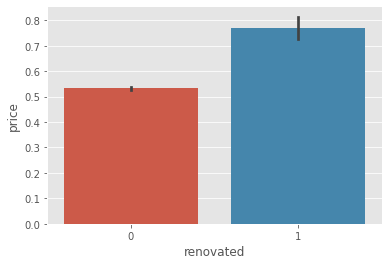

In [18]:
# The average renovated house price is more expensive than non-renovated houses
sns.barplot(x=data['renovated'], y=data['price'].div(1000000),data = data);

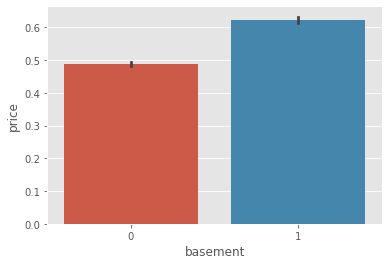

In [19]:
#the average price of the house with basement is more expensive than the others
sns.barplot(x=data['basement'], y=data['price'].div(1000000),data = data);

In [20]:
data.groupby('basement').mean()

price  bedrooms  bathrooms  sqft_living      sqft_lot  \
basement                                                                  
0         488471.703163  3.257078   2.018543  1934.140738  16242.795633   
1         623046.877480  3.558615   2.271161  2313.733558  13273.729109   

            floors  waterfront  condition     grade   sqft_above     yr_built  \
basement                                                                        
0         1.601920    0.004217   3.342620  7.610843  1924.369352  1974.811898   
1         1.321931    0.010821   3.517134  7.733077  1571.804858  1964.912589   

                lat        long  sqft_living15    sqft_lot15  renovated  
basement                                                                 
0         47.545115 -122.187994    1962.447892  13659.355422   0.028012  
1         47.584008 -122.255479    2025.217146  11319.515330   0.044728

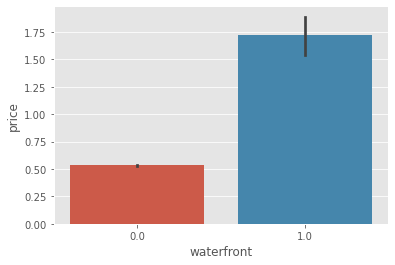

In [21]:
#the avearge price of the houses located with waterfront veiw is way more expensive than the others
sns.barplot(x=data['waterfront'], y=data['price'].div(1000000),data = data);

In [22]:
data.groupby('waterfront').mean()

price  bedrooms  bathrooms  sqft_living      sqft_lot  \
waterfront                                                                 
0.0         5.322862e+05  3.373363   2.111790  2072.396485  15026.095846   
1.0         1.717215e+06  3.349315   2.708904  3244.753425  25870.883562   

              floors  condition     grade   sqft_above     yr_built  \
waterfront                                                            
0.0         1.493170   3.408932  7.649900  1783.695259  1971.059018   
1.0         1.630137   3.541096  8.835616  2508.760274  1962.280822   

                  lat        long  sqft_living15    sqft_lot15  renovated  \
waterfront                                                                  
0.0         47.560232 -122.213546    1981.881777  12689.299753   0.033332   
1.0         47.539677 -122.278164    2682.828767  22893.698630   0.198630   

            basement  
waterfront            
0.0         0.383525  
1.0         0.616438

In [23]:
#Waterfront houses price map distribution
#import plotly.express as px

color_scale = [(0, 'yellow'), (1,'black')]

fig = px.scatter_mapbox(data, 
                        lat = data['lat'], 
                        lon = data['long'], 
                        hover_name = data["waterfront"], 
                        color = data["price"],
                        color_continuous_scale = color_scale,
                        size = data["price"],
                        zoom = 8, 
                        height = 800,
                        width = 800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

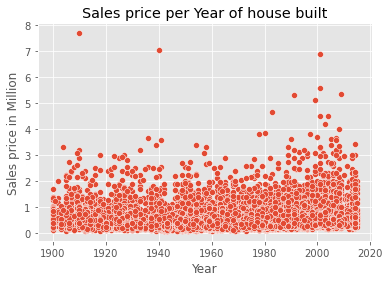

In [24]:
#hard to see any correlations
sns.scatterplot(x=data['yr_built'], y=data['price'].div(1000000), data=data)
plt.title('Sales price per Year of house built')
plt.xlabel('Year')
plt.ylabel('Sales price in Million');

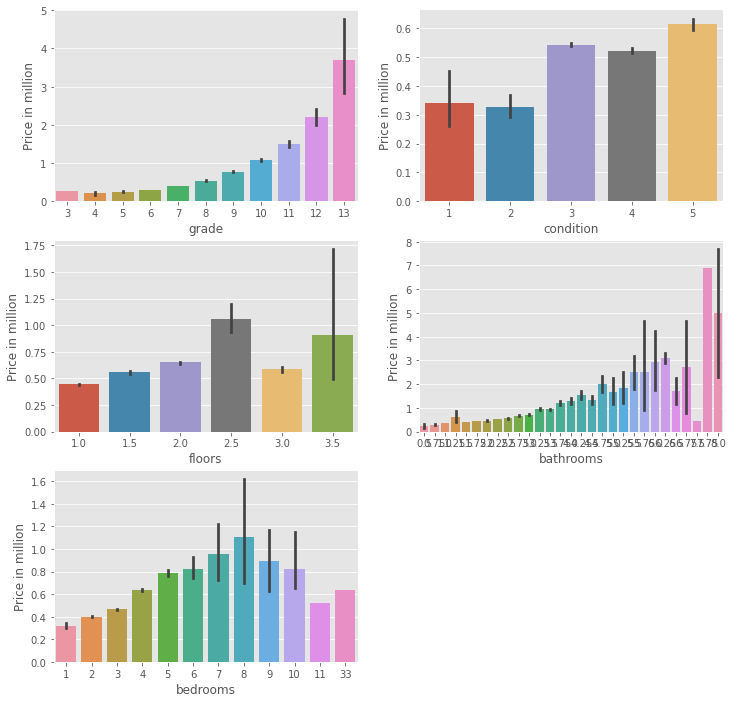

In [25]:
#bar plots for the potentially categorical data
#Grade: definately can see a linear relationship between price and grade
#Condition: higher condition got the highest average price, but not in direct proportion
#floor: more floors doesn't mean expensive
#number of bathrooms: it shows kind of a linear relationship but outliers
#number of bedrooms:it effect to the cost at a certain level - 8, but not a linear relationship

col = ['grade', 'condition', 'floors','bathrooms','bedrooms']
plt.figure(figsize=(12,12))

for i in enumerate(col):
    plt.subplot(3, 2, i[0]+1) 
    sns.barplot(x=i[1], y=data['price'].div(1000000),data = data)
    plt.ylabel('Price in million')

plt.show();

In [26]:
#drop some variances that won't be analysis
df1 =  data.drop(columns=['lat','long','sqft_living15','sqft_lot15'])

#### 1-2-3. Removing Outliers

In [27]:
#outliers boxplot setting
def boxplot(column):
    sns.boxplot(x=data[f"{column}"], data=df1)
    plt.title(f"Boxplot of {column}")
    plt.show()

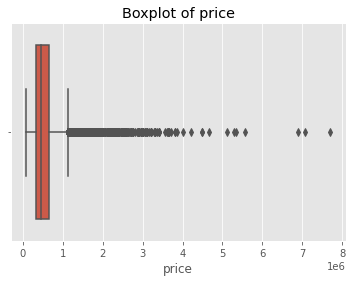

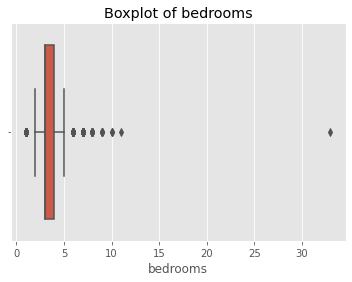

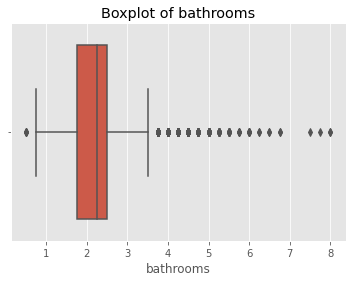

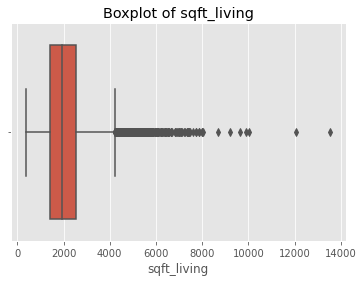

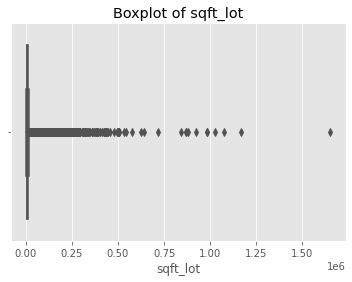

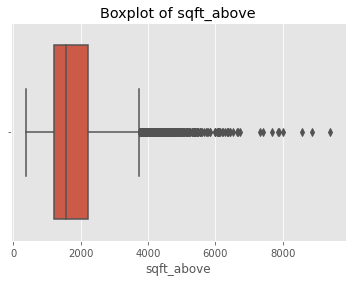

In [28]:
boxplot('price')
boxplot('bedrooms')
boxplot('bathrooms')
boxplot('sqft_living')
boxplot('sqft_lot')
boxplot('sqft_above')

In [29]:
for x in ['price']:
    q75,q25 = np.percentile(df1.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df1.loc[df1[x] < min,x] = np.nan
    df1.loc[df1[x] > max,x] = np.nan

In [30]:
for x in ['bedrooms']:
    q75,q25 = np.percentile(df1.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df1.loc[df1[x] < min,x] = np.nan
    df1.loc[df1[x] > max,x] = np.nan

In [31]:
for x in ['bathrooms']:
    q75,q25 = np.percentile(df1.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df1.loc[df1[x] < min,x] = np.nan
    df1.loc[df1[x] > max,x] = np.nan

In [32]:
for x in ['sqft_living']:
    q75,q25 = np.percentile(df1.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df1.loc[df1[x] < min,x] = np.nan
    df1.loc[df1[x] > max,x] = np.nan

In [33]:
for x in ['sqft_lot']:
    q75,q25 = np.percentile(df1.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df1.loc[df1[x] < min,x] = np.nan
    df1.loc[df1[x] > max,x] = np.nan

In [34]:
for x in ['sqft_above']:
    q75,q25 = np.percentile(df1.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df1.loc[df1[x] < min,x] = np.nan
    df1.loc[df1[x] > max,x] = np.nan

In [35]:
df1.isnull().sum()

price          1158
bedrooms        530
bathrooms       561
sqft_living     571
sqft_lot       2419
floors            0
waterfront        0
condition         0
grade             0
sqft_above      610
yr_built          0
renovated         0
basement          0
dtype: int64

In [36]:
#get the mean values of each variance
#fill the nan values with each variance
df1['price'] = df1['price'].fillna(df1['price'].median())
df1['bedrooms'] = df1['bedrooms'].fillna(df1['bedrooms'].median())
df1['bathrooms'] = df1['bathrooms'].fillna(df1['bathrooms'].median())
df1['sqft_living'] = df1['sqft_living'].fillna(df1['sqft_living'].median())
df1['sqft_lot'] = df1['sqft_lot'].fillna(df1['sqft_lot'].median())
df1['sqft_above'] = df1['sqft_above'].fillna(df1['sqft_above'].median())

In [37]:
df1.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
sqft_above     0
yr_built       0
renovated      0
basement       0
dtype: int64

In [38]:
df1.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  21597.000000   
mean   4.746006e+05      3.339121      2.064083   1996.525258   7364.370329   
std    2.023354e+05      0.792464      0.677816    758.673583   3414.650117   
min    7.800000e+04      2.000000      0.750000    370.000000    520.000000   
25%    3.220000e+05      3.000000      1.750000   1430.000000   5040.000000   
50%    4.375000e+05      3.000000      2.250000   1890.000000   7200.000000   
75%    5.900000e+05      4.000000      2.500000   2470.000000   9000.000000   
max    1.120000e+06      5.000000      3.500000   4230.000000  19141.000000   

             floors    waterfront     condition         grade    sqft_above  \
count  21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean       1.494096      0.006760      3.409825      7.657915   1707.666528   
std        0.539683      0.081944      0.650546      1.173200    686.557622   
min        1.000000      0.000000      1.000000      3.000000    370.000000   
25%        1.000000      0.000000      3.000000      7.000000   1190.000000   
50%        1.500000      0.000000      3.000000      7.000000   1540.000000   
75%        2.000000      0.000000      4.000000      8.000000   2110.000000   
max        3.500000      1.000000      5.000000     13.000000   3740.000000   

           yr_built     renovated     basement  
count  21597.000000  21597.000000  21597.00000  
mean    1970.999676      0.034449      0.38510  
std       29.375234      0.182384      0.48663  
min     1900.000000      0.000000      0.00000  
25%     1951.000000      0.000000      0.00000  
50%     1975.000000      0.000000      0.00000  
75%     1997.000000      0.000000      1.00000  
max     2015.000000      1.000000      1.00000

In [39]:
print('Unique values of bathrooms:',df1['bathrooms'].unique())
print('Unique values of bedrooms:',df1['bedrooms'].unique())

Unique values of bathrooms: [1.   2.25 3.   2.   1.5  2.5  1.75 2.75 3.25 3.5  0.75 1.25]
Unique values of bedrooms: [3. 2. 4. 5.]


In [40]:
#Bathroom values sorted to be 4 from 12 unique values
df1['bathrooms']=df1['bathrooms'].copy().astype(int)
df1['bedrooms']=df1['bedrooms'].copy().astype(int)

In [41]:
print('new unique values of bathrooms:',df1['bathrooms'].unique())
print('new unique values of bedrooms:',df1['bedrooms'].unique())
#Now they are categorical values with a smaller number of categories!

new unique values of bathrooms: [1 2 3 0]
new unique values of bedrooms: [3 2 4 5]


#### 1-2-4. Checking Data Distribution

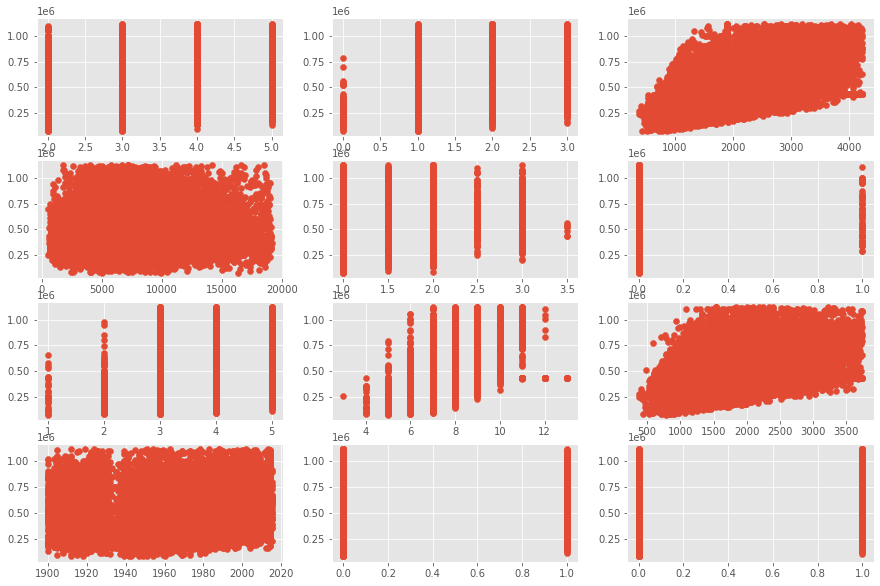

In [42]:
#check data distribution after removing outliers

dependent = ['bedrooms','bathrooms','sqft_living',
             'sqft_lot','floors','waterfront',
             'condition','grade','sqft_above',
             'yr_built','renovated','basement']

plt.figure(figsize=(15,10))

for i in enumerate(dependent):
    plt.subplot(4,3,i[0]+1 )
    plt.scatter(x =i[1], y ='price', data= df1);

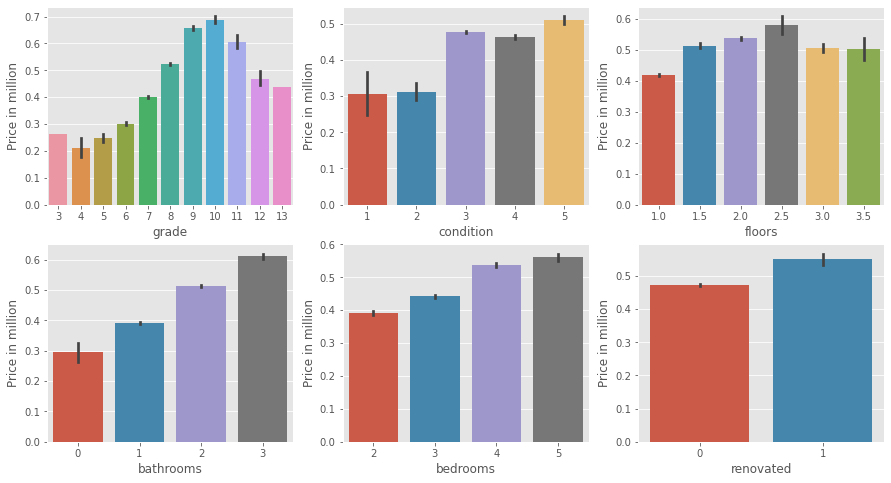

In [43]:
#check distribution with categorical variables

col = ['grade', 'condition', 'floors','bathrooms','bedrooms','renovated']
plt.figure(figsize=(15,8))

for i in enumerate(col):
    plt.subplot(2, 3, i[0]+1) 
    sns.barplot(x=i[1], y=df1['price'].div(1000000),data = df1)
    plt.ylabel('Price in million')

plt.show();

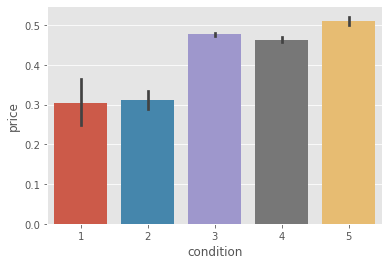

In [44]:
sns.barplot(x=df1['condition'], y=df1['price'].div(1000000),data = df1);

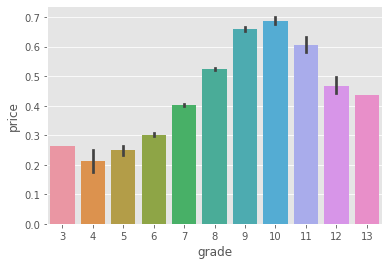

In [45]:
sns.barplot(x=df1['grade'], y=df1['price'].div(1000000),data = df1);

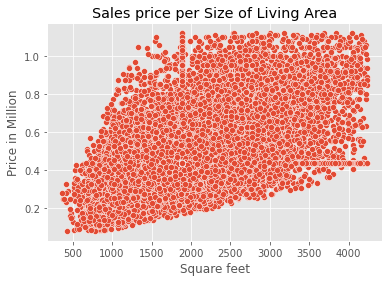

In [46]:
#Price per living area
sns.scatterplot(x=df1['sqft_living'],y=df1['price'].div(1000000) ,data=df1)
plt.title('Sales price per Size of Living Area')
plt.xlabel('Square feet')
plt.ylabel('Price in Million');
#corn-shaped, but clearly can see a linear relation of the data

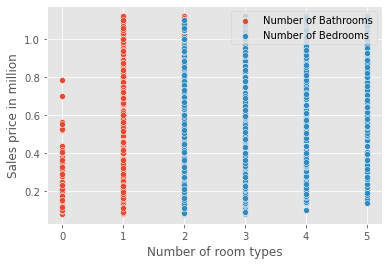

In [47]:
#Price per number of bathrooms and bedrooms
y=df1['price'].div(1000000)

sns.scatterplot(x=df1['bathrooms'], y=y, label='Number of Bathrooms')
sns.scatterplot(x=df1['bedrooms'], y=y, label='Number of Bedrooms')
plt.xlabel('Number of room types')
plt.ylabel('Sales price in million')
plt.legend(loc='upper right')
plt.show();
#very similiar shape of data distribution
#number of bathroom and bedroom effects sales price
#can identify outlier for the number of bedroom

## 2. Data Modeling
### 2-1. Baseline Modeling

In [48]:
outcome = 'price'
prediction = df1.drop('price', axis=1)

pred_sum = '+'.join(prediction.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     1299.
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:24:38   Log-Likelihood:            -2.8864e+05
No. Observations:               21597   AIC:                         5.773e+05
Df Residuals:                   21584   BIC:                         5.774e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     3.15e+06   9.41e+04     33.460      0.000    2.97e+06    3.33e+06
bedrooms    -1.217e+04   1631.580     -7.456      0.000   -1.54e+04   -8967.819
bathrooms    5047.3262   2353.051      2.145      0.032     435.173    9659.480
sqft_living    97.5610      2.812     34.694      0.000      92.049     103.073
sqft_lot       -7.0744      0.359    -19.699      0.000      -7.778      -6.370
floors       1.804e+04   2884.767      6.255      0.000    1.24e+04    2.37e+04
waterfront  -8.198e+04   1.29e+04     -6.336      0.000   -1.07e+05   -5.66e+04
condition    1.546e+04   1775.056      8.707      0.000     1.2e+04    1.89e+04
grade        6.328e+04   1313.176     48.187      0.000    6.07e+04    6.59e+04
sqft_above     18.2527      3.075      5.937      0.000      12.226      24.279
yr_built    -1719.1485     48.243    -35.635      0.000   -1813.708   -1624.589
renovated   -1037.6441   6052.111     -0.171      0.864   -1.29e+04    1.08e+04
basement     2.078e+04   2762.178      7.523      0.000    1.54e+04    2.62e+04
==============================================================================
Omnibus:                      818.082   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1156.465
Skew:                           0.383   Prob(JB):                    7.53e-252
Kurtosis:                       3.835   Cond. No.                     7.79e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Baseline Analysis
* The R-squared score is 0.419, still weak to say the model is convincing
* The p-values of variances are moslty less than 0.02, but the bathrooms, and the renovation variables got higher scores
* As the values are not scaled yet, the standard errors are not interpretable
* Skewness and Kurtosis are not statistically significant

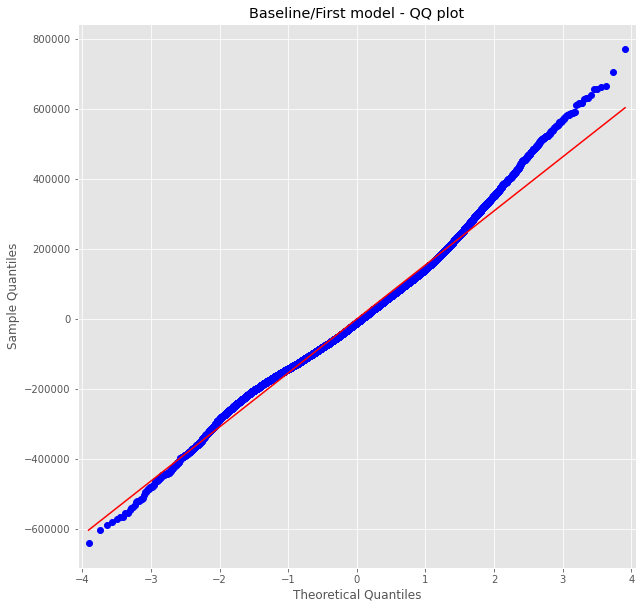

In [49]:
# non-normal distribution

residuals = model.resid

fig, ax = plt.subplots(1,1)
fig.set_figheight(10)
fig.set_figwidth(10)

sm.ProbPlot(residuals).qqplot(line='s',ax=ax)
ax.title.set_text('Baseline/First model - QQ plot');

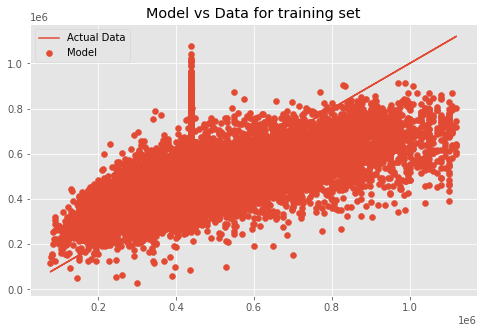

In [50]:
y = df1[['price']]
X = df1.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_prediction = linreg.predict(X_train) 
test_prediction = linreg.predict(X_test)

plt.figure(figsize=(8,5))
plt.scatter(y_train, train_prediction, label='Model')
plt.plot(y_train, y_train, label='Actual Data')
plt.title('Model vs Data for training set')
plt.legend();

### 2-2. Second Modeling
#### 2-2-1. hecking Multicollinearity
Identify overly high pairwise correlation to procude multicollinearity

In [51]:
corr = df1.corr()
corr

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price        1.000000  0.269811   0.356957     0.548653 -0.006966  0.257876   
bedrooms     0.269811  1.000000   0.412987     0.556370  0.204238  0.176560   
bathrooms    0.356957  0.412987   1.000000     0.595815 -0.015442  0.480855   
sqft_living  0.548653  0.556370   0.595815     1.000000  0.206704  0.337215   
sqft_lot    -0.006966  0.204238  -0.015442     0.206704  1.000000 -0.295829   
floors       0.257876  0.176560   0.480855     0.337215 -0.295829  1.000000   
waterfront   0.019421 -0.001791   0.026923     0.044092  0.053592  0.020797   
condition    0.035059  0.017195  -0.128685    -0.052697  0.107185 -0.264075   
grade        0.521669  0.363301   0.546637     0.644469  0.115095  0.458794   
sqft_above   0.438751  0.450704   0.532845     0.763615  0.159037  0.517114   
yr_built     0.057889  0.182578   0.457260     0.321302 -0.022873  0.489193   
renovated    0.070622  0.006630   0.045035     0.045677  0.002207  0.003713   
basement     0.150160  0.133946   0.113303     0.177655 -0.006204 -0.252465   

             waterfront  condition     grade  sqft_above  yr_built  renovated  \
price          0.019421   0.035059  0.521669    0.438751  0.057889   0.070622   
bedrooms      -0.001791   0.017195  0.363301    0.450704  0.182578   0.006630   
bathrooms      0.026923  -0.128685  0.546637    0.532845  0.457260   0.045035   
sqft_living    0.044092  -0.052697  0.644469    0.763615  0.321302   0.045677   
sqft_lot       0.053592   0.107185  0.115095    0.159037 -0.022873   0.002207   
floors         0.020797  -0.264075  0.458794    0.517114  0.489193   0.003713   
waterfront     1.000000   0.016648  0.082818    0.034894 -0.024487   0.074267   
condition      0.016648   1.000000 -0.146896   -0.151101 -0.361592  -0.055383   
grade          0.082818  -0.146896  1.000000    0.623088  0.447865   0.015259   
sqft_above     0.034894  -0.151101  0.623088    1.000000  0.418569   0.020935   
yr_built      -0.024487  -0.361592  0.447865    0.418569  1.000000  -0.202837   
renovated      0.074267  -0.055383  0.015259    0.020935 -0.202837   1.000000   
basement       0.039220   0.130542  0.050701   -0.217875 -0.163992   0.044600   

             basement  
price        0.150160  
bedrooms     0.133946  
bathrooms    0.113303  
sqft_living  0.177655  
sqft_lot    -0.006204  
floors      -0.252465  
waterfront   0.039220  
condition    0.130542  
grade        0.050701  
sqft_above  -0.217875  
yr_built    -0.163992  
renovated    0.044600  
basement     1.000000

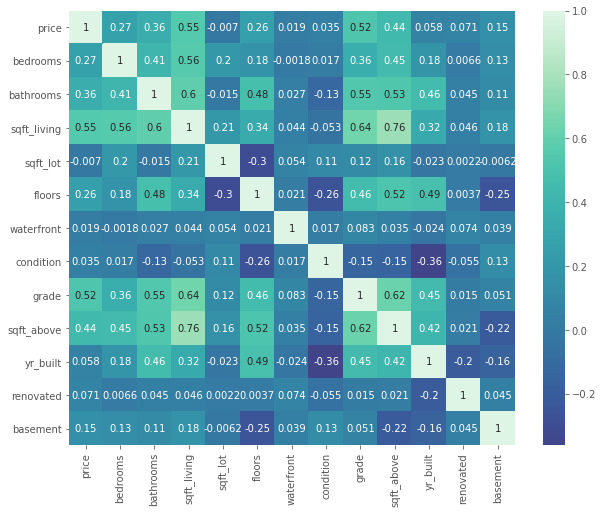

In [52]:
plt.figure(figsize=(10,8))
cmap=sns.color_palette("mako", as_cmap=True)
sns.heatmap(corr, center=0, annot=True, cmap=cmap);

In [53]:
dependent = ['bedrooms','bathrooms','sqft_living',
             'sqft_lot','floors','waterfront',
             'condition','grade','sqft_above',
             'yr_built','renovated','basement']

pred_corr = df1[dependent].corr()
pred_corr

bedrooms  bathrooms  sqft_living  sqft_lot    floors  waterfront  \
bedrooms     1.000000   0.412987     0.556370  0.204238  0.176560   -0.001791   
bathrooms    0.412987   1.000000     0.595815 -0.015442  0.480855    0.026923   
sqft_living  0.556370   0.595815     1.000000  0.206704  0.337215    0.044092   
sqft_lot     0.204238  -0.015442     0.206704  1.000000 -0.295829    0.053592   
floors       0.176560   0.480855     0.337215 -0.295829  1.000000    0.020797   
waterfront  -0.001791   0.026923     0.044092  0.053592  0.020797    1.000000   
condition    0.017195  -0.128685    -0.052697  0.107185 -0.264075    0.016648   
grade        0.363301   0.546637     0.644469  0.115095  0.458794    0.082818   
sqft_above   0.450704   0.532845     0.763615  0.159037  0.517114    0.034894   
yr_built     0.182578   0.457260     0.321302 -0.022873  0.489193   -0.024487   
renovated    0.006630   0.045035     0.045677  0.002207  0.003713    0.074267   
basement     0.133946   0.113303     0.177655 -0.006204 -0.252465    0.039220   

             condition     grade  sqft_above  yr_built  renovated  basement  
bedrooms      0.017195  0.363301    0.450704  0.182578   0.006630  0.133946  
bathrooms    -0.128685  0.546637    0.532845  0.457260   0.045035  0.113303  
sqft_living  -0.052697  0.644469    0.763615  0.321302   0.045677  0.177655  
sqft_lot      0.107185  0.115095    0.159037 -0.022873   0.002207 -0.006204  
floors       -0.264075  0.458794    0.517114  0.489193   0.003713 -0.252465  
waterfront    0.016648  0.082818    0.034894 -0.024487   0.074267  0.039220  
condition     1.000000 -0.146896   -0.151101 -0.361592  -0.055383  0.130542  
grade        -0.146896  1.000000    0.623088  0.447865   0.015259  0.050701  
sqft_above   -0.151101  0.623088    1.000000  0.418569   0.020935 -0.217875  
yr_built     -0.361592  0.447865    0.418569  1.000000  -0.202837 -0.163992  
renovated    -0.055383  0.015259    0.020935 -0.202837   1.000000  0.044600  
basement      0.130542  0.050701   -0.217875 -0.163992   0.044600  1.000000

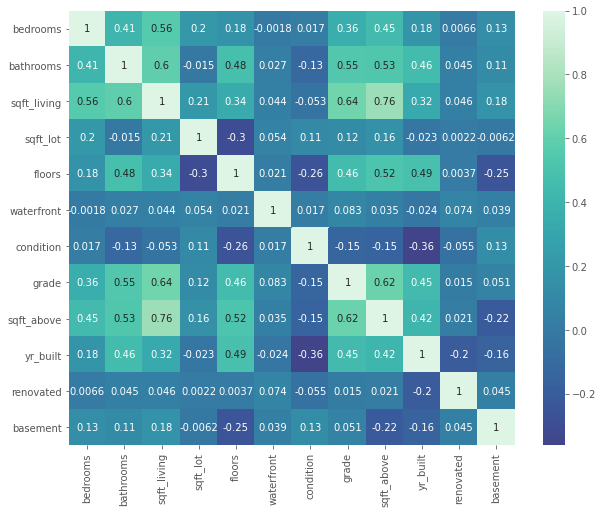

In [54]:
plt.figure(figsize=(10,8))
cmap=sns.color_palette("mako", as_cmap=True)
sns.heatmap(pred_corr, center=0, annot=True, cmap=cmap);

In [55]:
#remove highest correlation variable
df2 = df1.drop(columns=['sqft_above'])

In [56]:
df2.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  21597.000000   
mean   4.746006e+05      3.339121      1.702644   1996.525258   7364.370329   
std    2.023354e+05      0.792464      0.638358    758.673583   3414.650117   
min    7.800000e+04      2.000000      0.000000    370.000000    520.000000   
25%    3.220000e+05      3.000000      1.000000   1430.000000   5040.000000   
50%    4.375000e+05      3.000000      2.000000   1890.000000   7200.000000   
75%    5.900000e+05      4.000000      2.000000   2470.000000   9000.000000   
max    1.120000e+06      5.000000      3.000000   4230.000000  19141.000000   

             floors    waterfront     condition         grade      yr_built  \
count  21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean       1.494096      0.006760      3.409825      7.657915   1970.999676   
std        0.539683      0.081944      0.650546      1.173200     29.375234   
min        1.000000      0.000000      1.000000      3.000000   1900.000000   
25%        1.000000      0.000000      3.000000      7.000000   1951.000000   
50%        1.500000      0.000000      3.000000      7.000000   1975.000000   
75%        2.000000      0.000000      4.000000      8.000000   1997.000000   
max        3.500000      1.000000      5.000000     13.000000   2015.000000   

          renovated     basement  
count  21597.000000  21597.00000  
mean       0.034449      0.38510  
std        0.182384      0.48663  
min        0.000000      0.00000  
25%        0.000000      0.00000  
50%        0.000000      0.00000  
75%        0.000000      1.00000  
max        1.000000      1.00000

#### 2-2-2. Creating Dummy Variables

In [57]:
# change data type as Categories
df2.bedrooms = df2.bedrooms.astype('category')
df2.bathrooms = df2.bathrooms.astype('category')
df2.floors = df2.floors.astype('category')
df2.waterfront = df2.waterfront.astype('category')
df2.condition = df2.condition.astype('category')
df2.grade = df2.grade.astype('category')
df2.renovated = df2.renovated.astype('category')
df2.basement = df2.basement.astype('category')

In [58]:
#make dummies for categorical variables
bed_dummies = pd.get_dummies(df2['bedrooms'], prefix='bed', drop_first=True)
bth_dummies = pd.get_dummies(df2['bathrooms'], prefix='bth', drop_first=True)
flr_dummies = pd.get_dummies(df2['floors'], prefix='flr', drop_first=True)
wtr_dummies = pd.get_dummies(df2['waterfront'], prefix='wtr', drop_first=True)
con_dummies = pd.get_dummies(df2['condition'], prefix='con', drop_first=True)
grd_dummies = pd.get_dummies(df2['grade'], prefix='grd', drop_first=True)
reno_dummies = pd.get_dummies(df2['renovated'], prefix='ren', drop_first=True)
bs_dummies = pd.get_dummies(df2['basement'], prefix='bs', drop_first=True)

In [59]:
# add dummies and remove the original coloumns
df2 = df2.join([bed_dummies,bth_dummies,flr_dummies,wtr_dummies,con_dummies,
                grd_dummies,reno_dummies, bs_dummies])

In [60]:
df2.drop(['bedrooms','bathrooms','floors','waterfront','condition','grade',
          'basement','renovated',],axis=1, inplace=True)

In [61]:
df2.columns = df2.columns.str.replace(".", "_")
df2.head()

price  sqft_living  sqft_lot  yr_built  bed_3  bed_4  bed_5  bth_1  \
0  221900.0       1180.0    5650.0      1955      1      0      0      1   
1  538000.0       2570.0    7242.0      1951      1      0      0      0   
2  180000.0        770.0   10000.0      1933      0      0      0      1   
3  604000.0       1960.0    5000.0      1965      0      1      0      0   
4  510000.0       1680.0    8080.0      1987      1      0      0      0   

   bth_2  bth_3  ...  grd_6  grd_7  grd_8  grd_9  grd_10  grd_11  grd_12  \
0      0      0  ...      0      1      0      0       0       0       0   
1      1      0  ...      0      1      0      0       0       0       0   
2      0      0  ...      1      0      0      0       0       0       0   
3      0      1  ...      0      1      0      0       0       0       0   
4      1      0  ...      0      0      1      0       0       0       0   

   grd_13  ren_1  bs_1  
0       0      0     0  
1       0      1     1  
2       0      0     0  
3       0      0     1  
4       0      0     0  

[5 rows x 32 columns]

#### 2-2-3. Checking ModelingResult - Second Modeling

In [62]:
outcome = 'price'
prediction = df2.drop('price', axis=1)

pred_sum = '+'.join(prediction.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=df2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     564.6
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:24:43   Log-Likelihood:            -2.8809e+05
No. Observations:               21597   AIC:                         5.763e+05
Df Residuals:                   21565   BIC:                         5.765e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.837e+06   1.84e+05     20.801      0.000    3.48e+06     4.2e+06
sqft_living    88.1037      2.281     38.623      0.000      83.633      92.575
sqft_lot       -5.4463      0.355    -15.326      0.000      -6.143      -4.750
yr_built    -1868.6827     53.820    -34.721      0.000   -1974.173   -1763.192
bed_3       -2.257e+04   3509.896     -6.431      0.000   -2.95e+04   -1.57e+04
bed_4       -2.483e+04   4094.852     -6.063      0.000   -3.29e+04   -1.68e+04
bed_5       -3.137e+04   5462.547     -5.743      0.000   -4.21e+04   -2.07e+04
bth_1       -2.946e+04   1.91e+04     -1.546      0.122   -6.68e+04    7898.290
bth_2       -2.086e+04   1.92e+04     -1.084      0.278   -5.86e+04    1.68e+04
bth_3       -1.525e+04   1.96e+04     -0.777      0.437   -5.37e+04    2.32e+04
flr_1_5      2.225e+04   4103.403      5.422      0.000    1.42e+04    3.03e+04
flr_2_0      1.312e+04   3270.500      4.013      0.000    6713.562    1.95e+04
flr_2_5     -4.507e+04   1.23e+04     -3.676      0.000   -6.91e+04    -2.1e+04
flr_3_0      5.402e+04   7238.888      7.462      0.000    3.98e+04    6.82e+04
flr_3_5      3.267e+04    5.7e+04      0.573      0.567   -7.92e+04    1.44e+05
wtr_1_0     -5.846e+04   1.27e+04     -4.607      0.000   -8.33e+04   -3.36e+04
con_2       -1.396e+04   3.03e+04     -0.461      0.645   -7.34e+04    4.55e+04
con_3        3.198e+04   2.82e+04      1.134      0.257   -2.33e+04    8.73e+04
con_4        4.147e+04   2.82e+04      1.470      0.142   -1.38e+04    9.68e+04
con_5        6.013e+04   2.84e+04      2.120      0.034    4525.600    1.16e+05
grd_4       -2.804e+04   1.54e+05     -0.183      0.855   -3.29e+05    2.73e+05
grd_5       -1.826e+04   1.52e+05     -0.120      0.904   -3.16e+05    2.79e+05
grd_6        2.667e+04   1.52e+05      0.176      0.860   -2.71e+05    3.24e+05
grd_7        1.216e+05   1.52e+05      0.802      0.423   -1.76e+05    4.19e+05
grd_8        2.249e+05   1.52e+05      1.482      0.138   -7.26e+04    5.22e+05
grd_9        3.269e+05   1.52e+05      2.154      0.031    2.94e+04    6.24e+05
grd_10       3.418e+05   1.52e+05      2.251      0.024    4.41e+04    6.39e+05
grd_11       2.989e+05   1.52e+05      1.967      0.049    1057.544    5.97e+05
grd_12       2.063e+05   1.53e+05      1.352      0.176   -9.28e+04    5.05e+05
grd_13       1.877e+05   1.57e+05      1.193      0.233   -1.21e+05    4.96e+05
ren_1       -6070.0320   5943.740     -1.021      0.307   -1.77e+04    5580.139
bs_1         1.448e+04   2443.203      5.926      0.000    9689.898    1.93e+04
==============================================================================
Omnibus:                      982.169   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1411.940
Skew:                           0.432   Prob(J

#### Second Model Analysis
* The R-squared score is 0.448, which has got better than the baseline model (0.419)
* As the dummy variable are added, lots of independent variances have p-values > 0.02

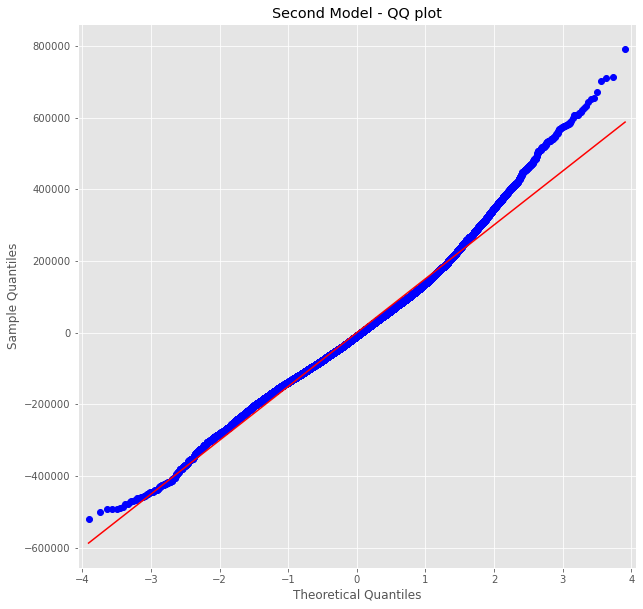

In [63]:
residuals = model.resid

fig, ax = plt.subplots(1,1)
fig.set_figheight(10)
fig.set_figwidth(10)

sm.ProbPlot(residuals).qqplot(line='s',ax=ax)
ax.title.set_text('Second Model - QQ plot');

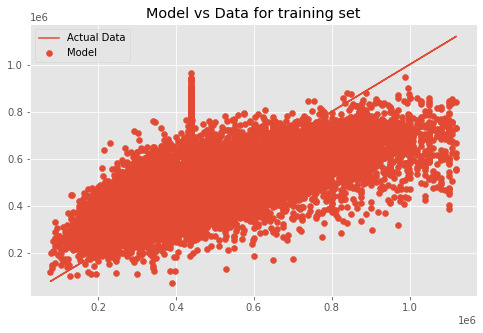

In [64]:
y = df2[['price']]
X = df2.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_prediction = linreg.predict(X_train) 
test_prediction = linreg.predict(X_test)

plt.figure(figsize=(8,5))
plt.scatter(y_train, train_prediction, label='Model')
plt.plot(y_train, y_train, label='Actual Data')
plt.title('Model vs Data for training set')
plt.legend();

* Can see a linear relationship with the size of living area
* Also can see a linaer relationship with size of lot and above - means high possiblitiy to have multicollinearity

### 2-3. Third Modeling
#### 2-3-1. Log Transformation & Scaling - Normalising Data

In [65]:
df3 = df2.copy()

In [66]:
#transformation
#log transformation for continuous variables
logprice = np.log(df3['price'])
logsqlv = np.log(df3['sqft_living'])
logsqlo = np.log(df3['sqft_lot'])
logyrblt = np.log(df3['yr_built'])

In [67]:
#transformation
#scalings
scaled_price = (logprice-np.mean(logprice))/np.sqrt(np.var(logprice))
scaled_sqlv = (logsqlv-np.mean(logsqlv))/np.sqrt(np.var(logsqlv))
scaled_sqlo = (logsqlo-np.mean(logsqlo))/np.sqrt(np.var(logsqlo))
scaled_yrblt = (logyrblt-np.mean(logyrblt))/np.sqrt(np.var(logyrblt))

In [68]:
df3['price'] = scaled_price
df3['sqft_living'] = scaled_sqlv
df3['sqft_lot'] = scaled_sqlo
df3['yr_built'] = scaled_yrblt

#### 2-3-2. Checking ModelingResult - Third Modeling

In [69]:
outcome = 'price'
predictors = df3.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=df3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     640.7
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:24:43   Log-Likelihood:                -23595.
No. Observations:               21597   AIC:                         4.725e+04
Df Residuals:                   21565   BIC:                         4.751e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.4792      0.736     -0.651      0.515      -1.922       0.963
sqft_living     0.3912      0.009     42.833      0.000       0.373       0.409
sqft_lot       -0.1393      0.007    -20.563      0.000      -0.153      -0.126
yr_built       -0.2839      0.008    -37.554      0.000      -0.299      -0.269
bed_3          -0.1712      0.017     -9.932      0.000      -0.205      -0.137
bed_4          -0.1825      0.020     -8.969      0.000      -0.222      -0.143
bed_5          -0.2039      0.027     -7.638      0.000      -0.256      -0.152
bth_1          -0.2527      0.092     -2.759      0.006      -0.432      -0.073
bth_2          -0.2088      0.093     -2.256      0.024      -0.390      -0.027
bth_3          -0.1846      0.094     -1.956      0.050      -0.370       0.000
flr_1_5         0.0614      0.020      3.065      0.002       0.022       0.101
flr_2_0         0.0234      0.016      1.430      0.153      -0.009       0.055
flr_2_5        -0.2687      0.059     -4.536      0.000      -0.385      -0.153
flr_3_0         0.1335      0.038      3.537      0.000       0.060       0.208
flr_3_5         0.0613      0.274      0.224      0.823      -0.476       0.599
wtr_1_0        -0.1634      0.061     -2.682      0.007      -0.283      -0.044
con_2          -0.0570      0.146     -0.392      0.695      -0.342       0.228
con_3           0.3170      0.135      2.342      0.019       0.052       0.582
con_4           0.3508      0.135      2.592      0.010       0.085       0.616
con_5           0.4318      0.136      3.172      0.002       0.165       0.699
grd_4          -0.7440      0.737     -1.009      0.313      -2.189       0.701
grd_5          -0.6675      0.729     -0.916      0.360      -2.096       0.761
grd_6          -0.3032      0.728     -0.416      0.677      -1.731       1.124
grd_7           0.2371      0.728      0.326      0.745      -1.191       1.665
grd_8           0.7391      0.729      1.014      0.310      -0.689       2.167
grd_9           1.1687      0.729      1.604      0.109      -0.260       2.597
grd_10          1.2261      0.729      1.682      0.093      -0.203       2.655
grd_11          1.0793      0.730      1.480      0.139      -0.351       2.509
grd_12          0.7880      0.733      1.076      0.282      -0.648       2.224
grd_13          0.7254      0.756      0.960      0.337      -0.756       2.206
ren_1          -0.0744      0.029     -2.608      0.009      -0.130      -0.018
bs_1            0.0380      0.012      3.091      0.002       0.014       0.062
==============================================================================
Omnibus:                       78.677   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.468
Skew:                          -0.149   Prob(J

#### Third Model Analysis
* The R-squared score is 0.479, which has been improved from the last models
* After normlising the data, the standard errors, skewness and Kurtosis got much better

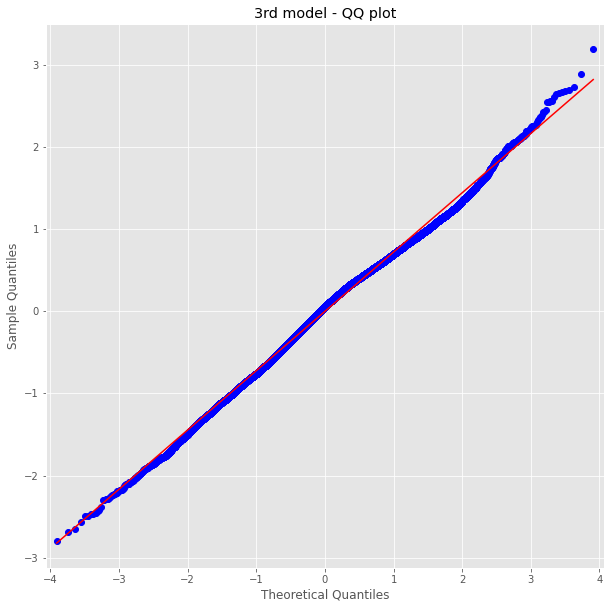

In [70]:
# Q-Q Plot to check normality of residuals
residuals = model.resid

fig, ax = plt.subplots(1,1)
fig.set_figheight(10)
fig.set_figwidth(10)

sm.ProbPlot(residuals).qqplot(line='s',ax=ax)
ax.title.set_text('3rd model - QQ plot');

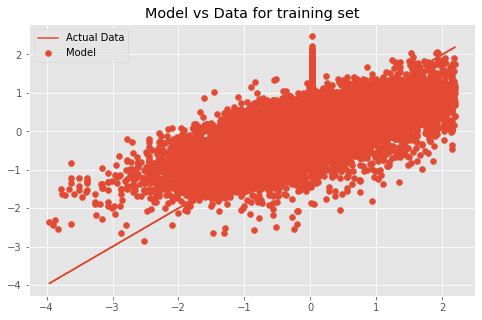

In [71]:
y = df3[['price']]
X = df3.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_prediction = linreg.predict(X_train) 
test_prediction = linreg.predict(X_test)

plt.figure(figsize=(8,5))
plt.scatter(y_train, train_prediction, label='Model')
plt.plot(y_train, y_train, label='Actual Data')
plt.title('Model vs Data for training set')
plt.legend();

#### Note
* The R-squared value 

### 2-4. Final Modelling
#### 2-4-1. Stepwise Variable Selection

In [72]:
#stepwise_selection feature elimination
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):

    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype='float64')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [73]:
x= df3.drop('price', axis=1)
y= df3['price']

result = stepwise_selection(x, y, verbose = True)
print('resulting features:')
print(result)

Add  grd_6                          with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  grd_7                          with p-value 1.42433e-250
Add  yr_built                       with p-value 2.12491e-303
Add  sqft_lot                       with p-value 1.1289e-210
Add  grd_5                          with p-value 2.26405e-158
Add  grd_8                          with p-value 4.58652e-150
Add  grd_4                          with p-value 5.77066e-38
Add  con_2                          with p-value 6.7689e-12
Add  flr_2_5                        with p-value 2.46537e-08
Add  con_5                          with p-value 3.18423e-08
Add  grd_12                         with p-value 5.63813e-07
Add  bed_3                          with p-value 4.89608e-05
Add  bed_4                          with p-value 5.91678e-07
Add  bed_5                          with p-value 7.82338e-12
Add  bth_1                          with p-value 0.00104179
Add  ren_1                          wi

In [74]:
final = df3.copy()

In [75]:
#drop the colums that has p-value > 0.05
final = final.drop(columns=['bth_2','bth_3','flr_1_5','flr_2_0','flr_3_5','wtr_1_0',
                            'con_3','grd_7','grd_13','bs_1'])

* 

#### 2-4-2. Checking ModelingResult - Final Modeling

In [76]:
outcome = 'price'
predictors = final.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=final).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     942.4
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:24:50   Log-Likelihood:                -23616.
No. Observations:               21597   AIC:                         4.728e+04
Df Residuals:                   21575   BIC:                         4.745e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.1050      0.020     -5.263      0.000      -0.144      -0.066
sqft_living     0.4006      0.009     46.958      0.000       0.384       0.417
sqft_lot       -0.1497      0.006    -25.181      0.000      -0.161      -0.138
yr_built       -0.2923      0.007    -43.449      0.000      -0.306      -0.279
bed_3          -0.1642      0.017     -9.573      0.000      -0.198      -0.131
bed_4          -0.1725      0.020     -8.551      0.000      -0.212      -0.133
bed_5          -0.1850      0.026     -7.006      0.000      -0.237      -0.133
bth_1          -0.0533      0.014     -3.810      0.000      -0.081      -0.026
flr_2_5        -0.2864      0.058     -4.955      0.000      -0.400      -0.173
flr_3_0         0.0979      0.033      2.938      0.003       0.033       0.163
con_2          -0.3713      0.056     -6.584      0.000      -0.482      -0.261
con_4           0.0331      0.012      2.685      0.007       0.009       0.057
con_5           0.1152      0.020      5.817      0.000       0.076       0.154
grd_4          -0.8977      0.141     -6.372      0.000      -1.174      -0.622
grd_5          -0.9121      0.049    -18.752      0.000      -1.007      -0.817
grd_6          -0.5424      0.019    -27.933      0.000      -0.580      -0.504
grd_8           0.5000      0.014     36.802      0.000       0.473       0.527
grd_9           0.9286      0.019     48.106      0.000       0.891       0.966
grd_10          0.9894      0.026     38.294      0.000       0.939       1.040
grd_11          0.8481      0.039     21.939      0.000       0.772       0.924
grd_12          0.5508      0.078      7.095      0.000       0.399       0.703
ren_1          -0.0802      0.028     -2.829      0.005      -0.136      -0.025
==============================================================================
Omnibus:                       84.909   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.846
Skew:                          -0.154   Prob(JB):                     2.28e-19
Kurtosis:                       3.004   Cond. No.                         38.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Final Model Analysis
* The R-squared score is 0.478 against the baseline model score 0.419
* The p-values of all the selected variances are all < 0.02, also close enough o zero including intercept
* The standard error values & Skewness got closer to 0

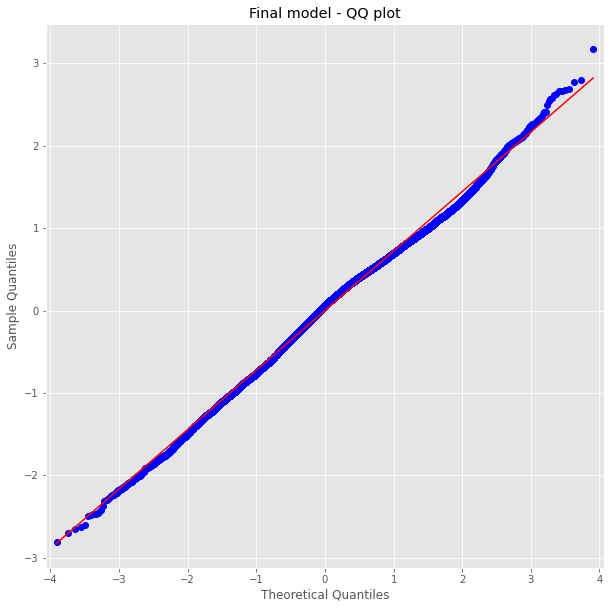

In [77]:
# Q-Q Plot to check normality of residuals
residuals = model.resid

fig, ax = plt.subplots(1,1)
fig.set_figheight(10)
fig.set_figwidth(10)

sm.ProbPlot(residuals).qqplot(line='s',ax=ax)
ax.title.set_text('Final model - QQ plot');

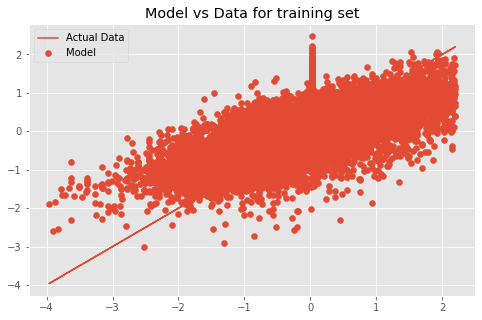

In [78]:
y = final[['price']]
X = final.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_prediction = linreg.predict(X_train) 
test_prediction = linreg.predict(X_test)

plt.figure(figsize=(8,5))
plt.scatter(y_train, train_prediction, label='Model')
plt.plot(y_train, y_train, label='Actual Data')
plt.title('Model vs Data for training set')
plt.legend();

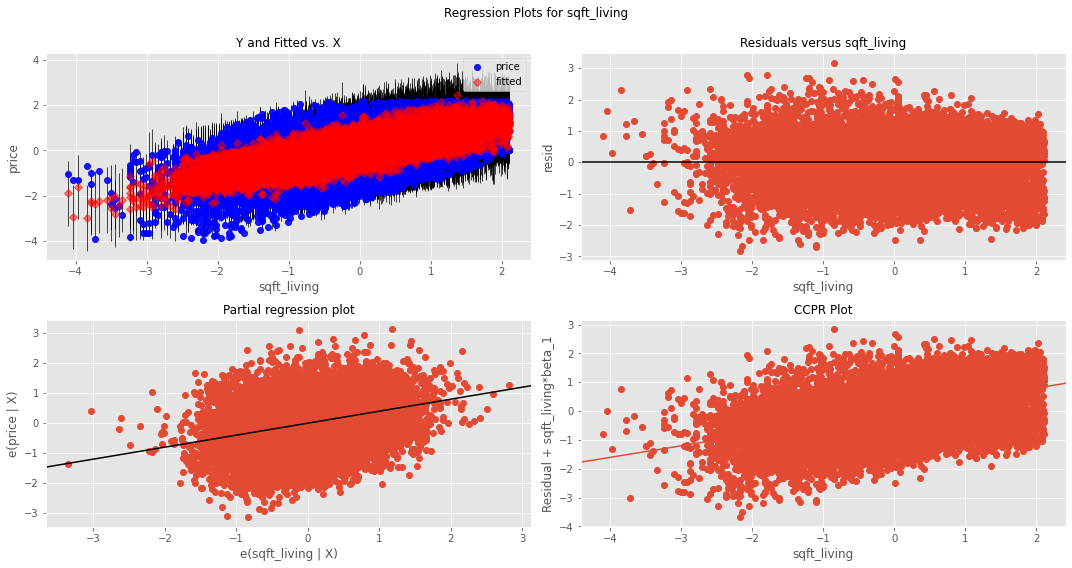

In [79]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show();

## 3. Model Validation
### 3-1. Train/Test Split Validation

In [80]:
train, test = train_test_split(final)

In [81]:
y = final[['price']]
X = final.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [82]:
print(len(X_train), len(X_test), len(y_train),len(y_test))

15117 6480 15117 6480


In [83]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [84]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [85]:
mse_train = np.sum((y_train - y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test - y_hat_test)**2)/len(y_test)
print('Train Mean Squared Error:', mse_train)
print('Test Mean Squared Error:', mse_test)
# The values are very clost to each other

Train Mean Squared Error: price    0.516711
dtype: float64
Test Mean Squared Error: price    0.533749
dtype: float64


### 3-2. Cross Validation

In [86]:
print('K-Fold validated MSE:',
      cross_val_score (linreg, X, y, cv=10,scoring=make_scorer(mean_squared_error)).mean())
# the values is in between of the train & test MSE which is perfect

K-Fold validated MSE: 0.5239590905740555


In [87]:
#R-Squared
print('K-Fold validated R-squared:',cross_val_score (linreg, X, y, cv=10).mean())

K-Fold validated R-squared: 0.4726685256676101


In [88]:
train_prediction = linreg.predict(X_train) 
test_prediction = linreg.predict(X_test)

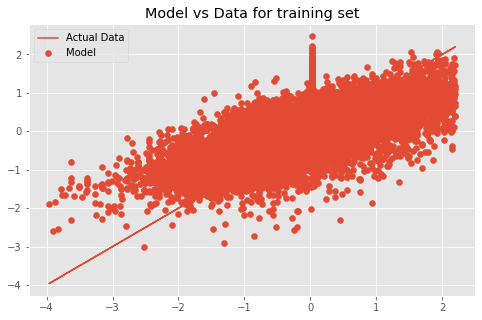

In [89]:
plt.figure(figsize=(8,5))
plt.scatter(y_train, train_prediction, label='Model')
plt.plot(y_train, y_train, label='Actual Data')
plt.title('Model vs Data for training set')
plt.legend();

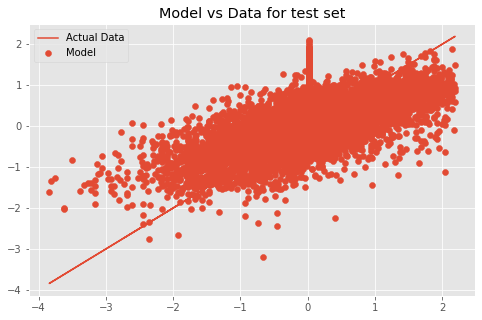

In [90]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, test_prediction, label='Model')
plt.plot(y_test, y_test, label='Actual Data')
plt.title('Model vs Data for test set')
plt.legend();

### 3-3. Checking Coefficients

In [91]:
coeff = model.params
ranked_features = coeff.sort_values(ascending=False)

In [92]:
coeff_abs = pd.DataFrame(ranked_features, columns=['coeff'])

In [93]:
coeff_abs.sort_values(by='coeff', ascending=False)
#(by='coeff', key=abs, ascending=False)

coeff
grd_10       0.989412
grd_9        0.928594
grd_11       0.848129
grd_12       0.550844
grd_8        0.500020
sqft_living  0.400583
con_5        0.115207
flr_3_0      0.097911
con_4        0.033063
bth_1       -0.053268
ren_1       -0.080178
Intercept   -0.104953
sqft_lot    -0.149698
bed_3       -0.164165
bed_4       -0.172479
bed_5       -0.185018
flr_2_5     -0.286381
yr_built    -0.292322
con_2       -0.371274
grd_6       -0.542373
grd_4       -0.897693
grd_5       -0.912119

## 4. Conclusion
### The most effective features in terms of house pricing based on the multiple linear regression analysis:
* The most effective feature is the house grade: The average grade is 7.5, but at least need grade 10 for impactful house pricing
* Second most effective feature is the size of living area (square feet of living area)
* House condition, and the number of floor also are impacting the housing price positively. The average condition score is 3, and need 5 to have a positive impact for house pricing.

### Additionally, what we can add from general analysis :
* The water front houses are much more expensive than the other, however, it has not been identified here as the number is too small, and cannot be improved by renovation

## 5. Appendix
### 5-1. Condition: Relative to Age and Grade
* 1= Poor Many repairs needed. Showing serious deterioration.
* 2= Fair Some repairs needed immediately. Much deferred maintenance.
* 3= Average Depending upon age of improvement; normal amount of upkeep for the age of the home.
* 4= Good Condition above the norm for the age of the home. Indicates extra attention and care has been taken to maintain.
* 5= Very Good Excellent maintenance and updating on home. Not a total renovation.

### 5-2. Residential Building Grades
* Grades 1 - 3 Falls short of minimum building standards. Normally cabin or inferior structure.
* Grade 4 Generally older low quality construction. Does not meet code.
* Grade 5 Lower construction costs and workmanship. Small, simple design.
* Grade 6 Lowest grade currently meeting building codes. Low quality materials, simple designs.
* Grade 7 Average grade of construction and design. Commonly seen in plats and older subdivisions.
* Grade 8 Just above average in construction and design. Usually better materials in both the exterior and interior finishes.
* Grade 9 Better architectural design, with extra exterior and interior design and quality.
* Grade 10 Homes of this quality generally have high quality features. Finish work is better, and more design quality is seen in the floor plans and larger square footage.
* Grade 11 Custom design and higher quality finish work, with added amenities of solid woods, bathroom fixtures and more luxurious options.
* Grade 12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.
* Grade 13 Generally custom designed and built. Approaching the Mansion level. Large amount of highest quality cabinet work, wood trim and marble; large entries

Reference: https://kingcounty.gov/depts/assessor/Reports/area-reports/2016/~/media/depts/Assessor/documents/AreaReports/2016/Residential/034.ashx